In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import os
from scipy.io import loadmat
from PIL import Image
from scipy.spatial import distance
from random import randrange
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import pandas as pd
from PIL import Image
from sklearn.metrics import f1_score
from sklearn.metrics import homogeneity_score
from scipy.misc import imresize
from math import log10

# Visualize the image and the ground truth segmentation 

In [2]:
def ImageAndSegmentations(imagename):
    os.chdir('/home/harry/python/kmeans-spectral-clustering/BSR/BSDS500/data/images/train')
    img=mpimg.imread(imagename+".jpg")
    imgplot = plt.imshow(img)
    plt.show()
    os.chdir('/home/harry/python/kmeans-spectral-clustering/BSR/BSDS500/data/groundTruth/train')
    mat = loadmat(imagename+".mat")
    for i in range(0,10):
        for j in range (0,2):
            try:
                plt.imshow(mat['groundTruth'][0][i][0][0][j])
                plt.show()
            except IndexError:
                pass
            continue
    return img,mat

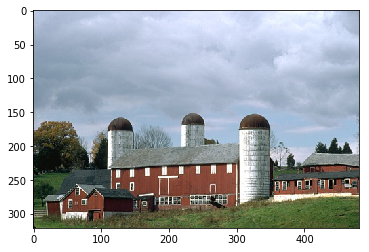

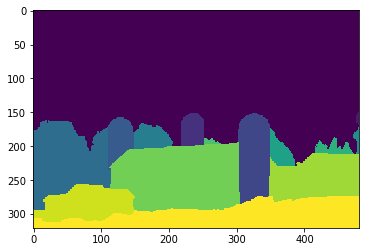

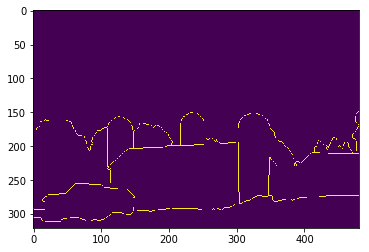

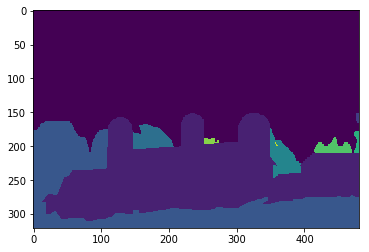

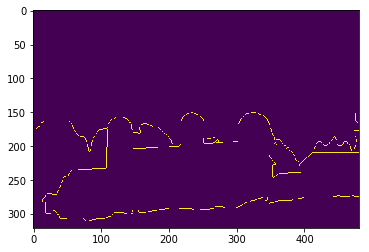

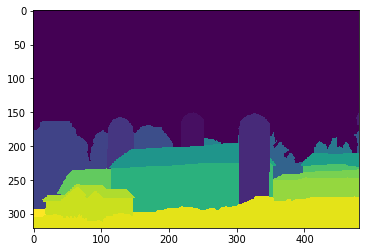

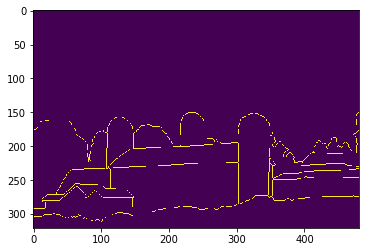

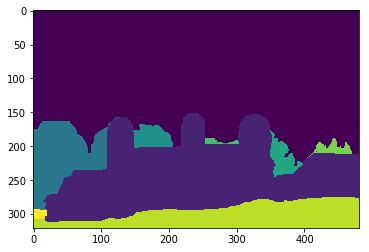

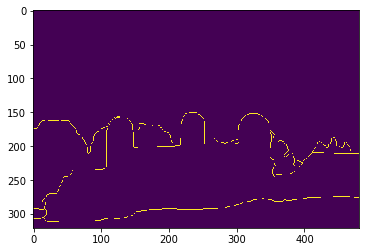

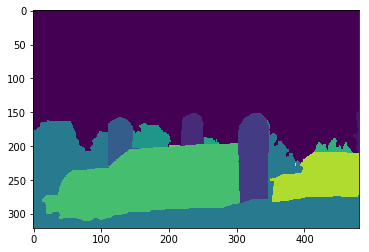

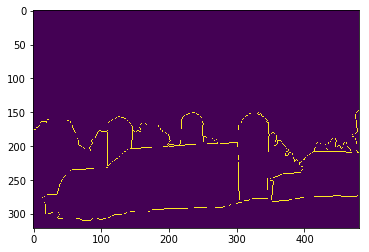

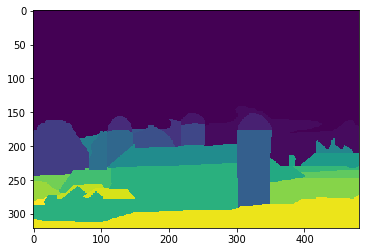

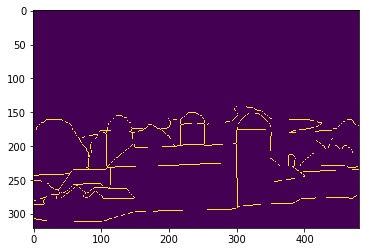

In [3]:
img,mat = ImageAndSegmentations("97017")
hight = img.shape[0]
width = img.shape[1]

In [4]:
def From3DTo2D(img):
    new_img = img.reshape(((img.shape[0]*img.shape[1])), img.shape[2])
    return new_img

def From2DTo3D(image,hight,width):
    return image.reshape((hight,width))
    

In [5]:
def ClusterIndicesNumpy(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]

# Segmentation using K-means 

In [6]:
Kmean_img = From3DTo2D(img)
Kmean_img.shape

(154401, 3)

Number Of Clusters =  3


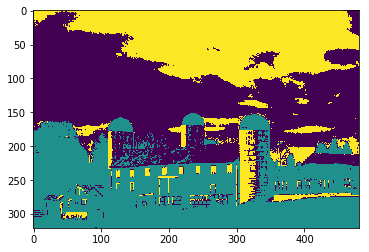

Number Of Clusters =  5


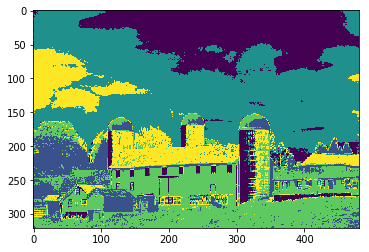

Number Of Clusters =  7


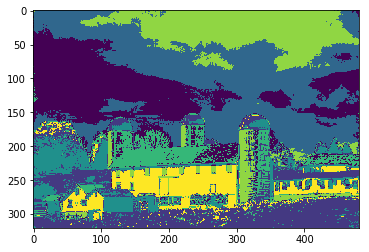

Number Of Clusters =  9


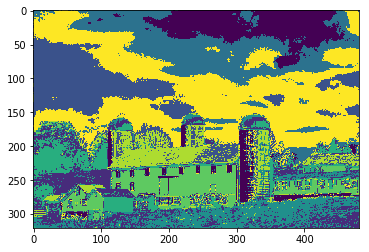

Number Of Clusters =  11


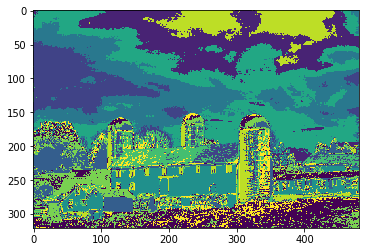

In [7]:
for i in (3,5,7,9,11):
    kmeans = KMeans(n_clusters = i).fit(Kmean_img)
    label = kmeans.labels_
    image =  From2DTo3D(label,hight,width)
    print ("Number Of Clusters = ",i)
    plt.imshow(image)
    plt.show()

# Evaluation

# F1 Score Evaluation

In [9]:
f1score = 0
counter = 0
for i in (3,5,7,9,11):
    counter = 0
    f1score = 0
    kmeans = KMeans(n_clusters = i).fit(Kmean_img)
    label = kmeans.labels_
    for k in range (10):
        try:
            x = mat['groundTruth'][0][k][0][0][0]
            x = x.reshape(hight*width)
            f1score = f1score + f1_score(x,label, average='micro')
            counter = counter +1
            #print(f1score)
        except IndexError:
                pass
        continue
    #print(counter)
    print("For K = ",i,"The F1 score is :",f1score/counter)

For K =  3 The F1 score is : 0.013197237496302918
For K =  5 The F1 score is : 0.016408572483338837
For K =  7 The F1 score is : 0.30554638031273545
For K =  9 The F1 score is : 0.2616887196326449
For K =  11 The F1 score is : 0.017283998592409804


# Conditional Entropy

In [10]:
def Condetional_Entropy(label):
    numbers = []
    lenght = []  
    for i in range(10):
        try:
            x = mat['groundTruth'][0][i][0][0][0]
            x = x.reshape(hight*width)
            for k in range(kmeans.n_clusters):
                index = ClusterIndicesNumpy(k, label) #getting the indcies of cluster 0 and 1 and 2 in case number of clusters is 3
                #print(label)
                #print(k,len(index))
                lenght.append(len(index))
                counter = 0
                #print("for cluster ",k)
                for i in index:
                    if (x[i]==k+1):
                        counter = counter + 1
                numbers.append(counter)
        except IndexError:
               pass
        continue
    return numbers,lenght

In [11]:
for j in (3,5,7,9,11):
    kmeans = KMeans(n_clusters = j).fit(Kmean_img)
    label = kmeans.labels_
    numbers,lenght = Condetional_Entropy(label)
    CE = 0
    for k in range(kmeans.n_clusters):
        zeros = []
        for i in range(k,len(numbers),kmeans.n_clusters):
            zeros.append(numbers[i])
        maximum = max(zeros)
        #print (k,maximum)
        #print (lenght[i])
        if (maximum!=0 and lenght[i]!=0):
            CE = CE - (maximum/lenght[i])*log10((maximum/lenght[i]))
    print("K = ",j,"The Conditional Entropy:",CE)

K =  3 The Conditional Entropy: 0.21979821263900934
K =  5 The Conditional Entropy: 0.33432278188206044
K =  7 The Conditional Entropy: 0.5690479201919877
K =  9 The Conditional Entropy: 0.6774847765200481
K =  11 The Conditional Entropy: 0.7871132210189142


# Spectral Clustering Segmentation

In [23]:
def ResizeImage(image,hight,width):
    os.chdir('/home/harry/python/kmeans-spectral-clustering/BSR/BSDS500/data/images/train')
    im = Image.open(image)
    y = int(hight/4)
    x = int(width/4)
    im =  im.resize((x,y))
    image = np.asarray(im)
    return image,y,x   

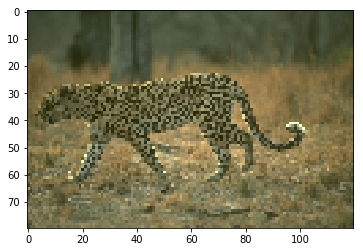

In [32]:
image,h,w = ResizeImage("134052.jpg",hight,width)
plt.imshow(image)
image = From3DTo2D(image)

/home/harry/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Number Of Clusters =  5


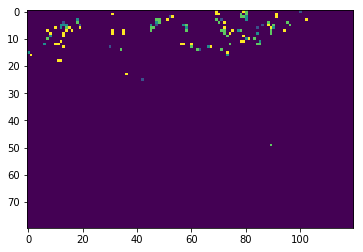

In [33]:
clustering = SpectralClustering(n_clusters=5,affinity='nearest_neighbors',assign_labels="discretize",).fit(image)
label = clustering.labels_
image =  From2DTo3D(label,h,w)
print ("Number Of Clusters = ",5)
plt.imshow(image)
plt.show()

# Big Picture

In [15]:
Pictures_List = ["117054","164074","216053","372047","90076"]

For The Picture :  117054


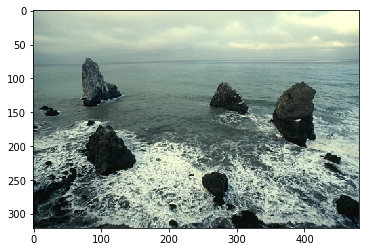

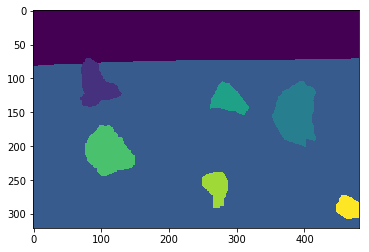

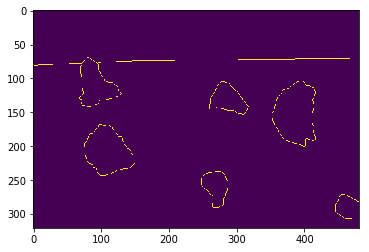

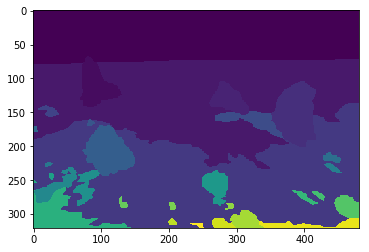

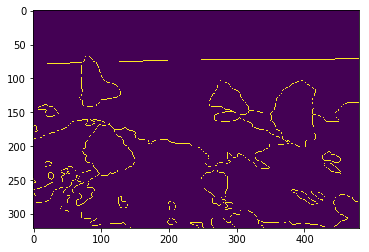

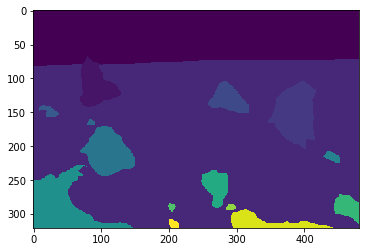

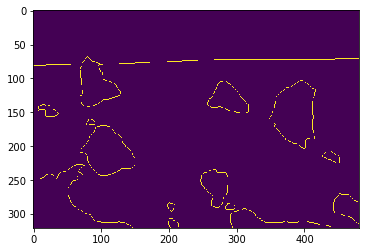

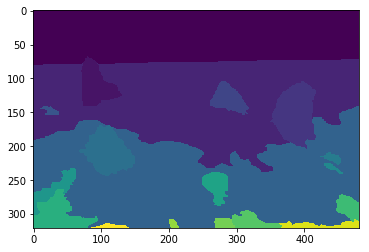

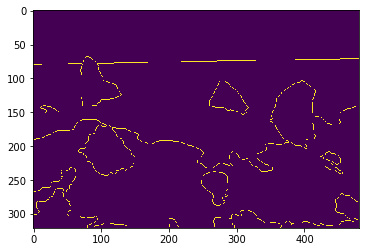

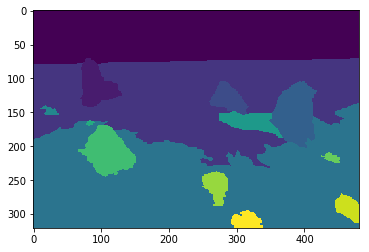

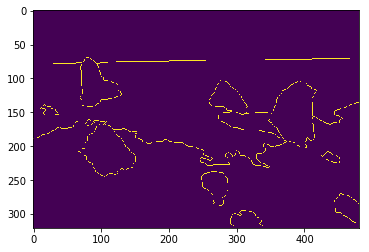

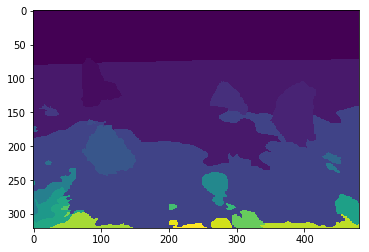

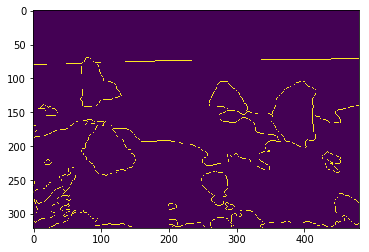

My Segmentation With K = 5 :


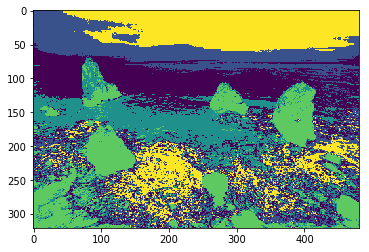

For The Picture :  164074


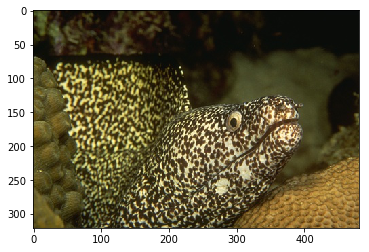

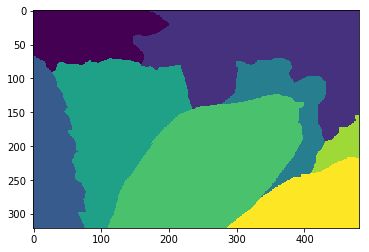

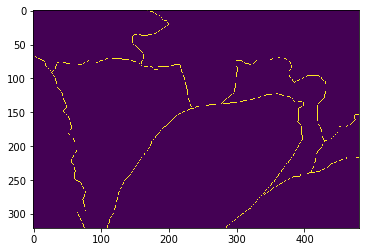

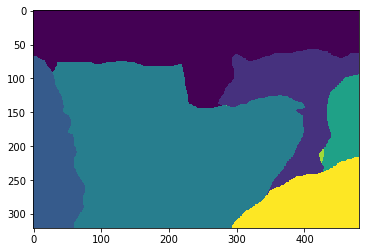

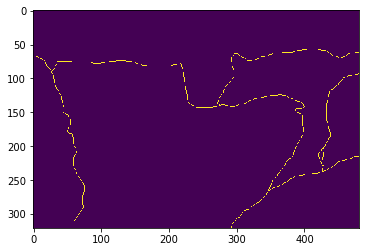

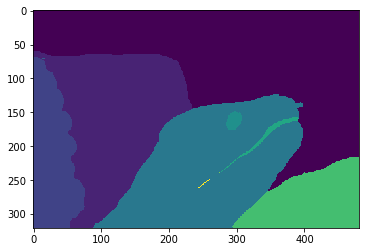

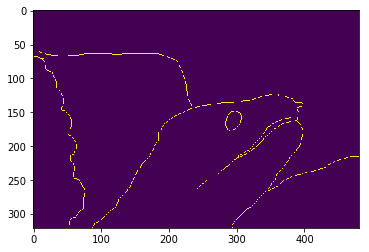

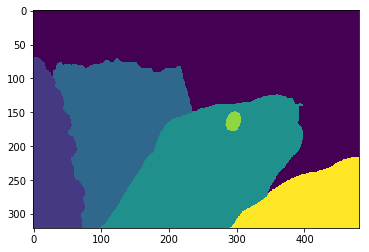

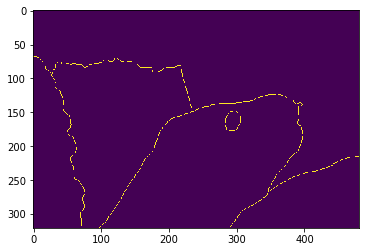

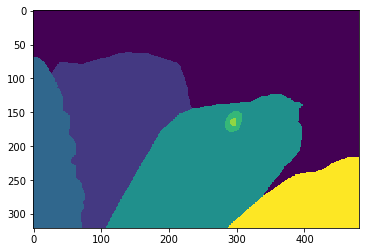

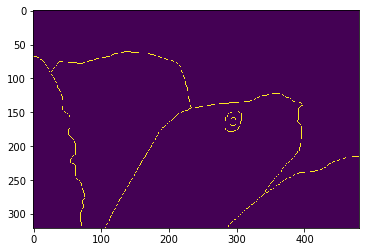

My Segmentation With K = 5 :


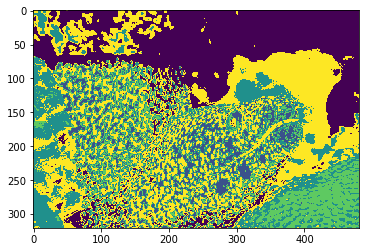

For The Picture :  216053


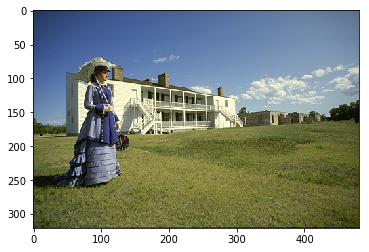

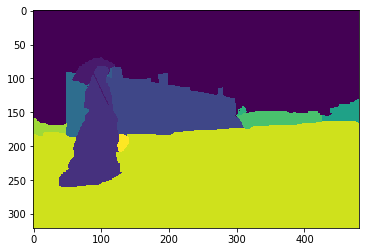

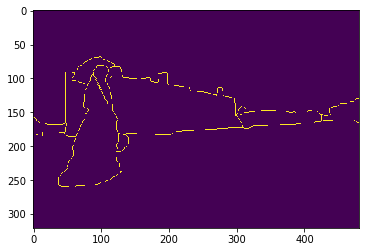

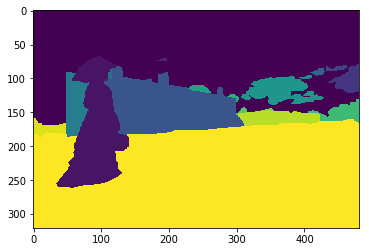

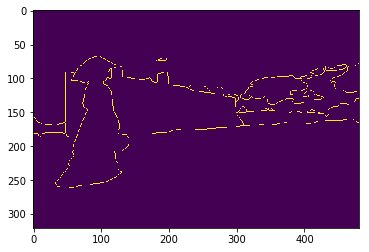

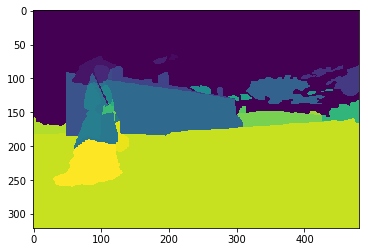

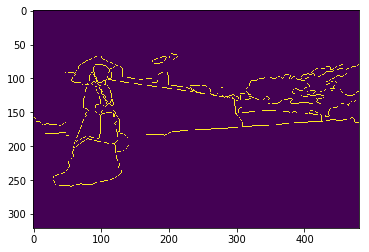

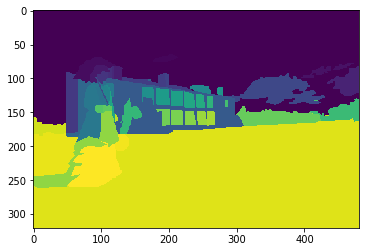

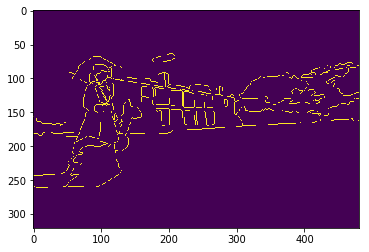

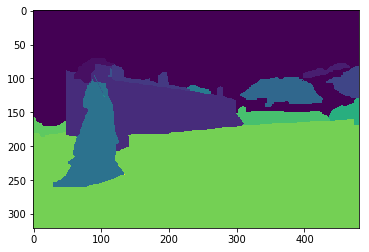

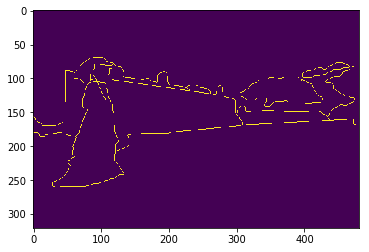

My Segmentation With K = 5 :


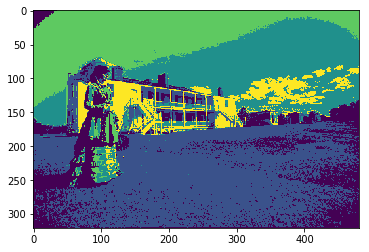

For The Picture :  372047


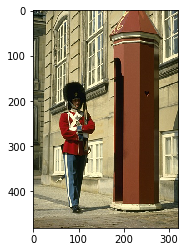

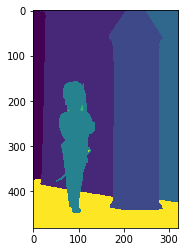

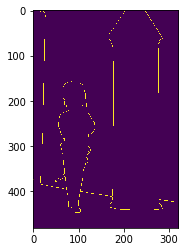

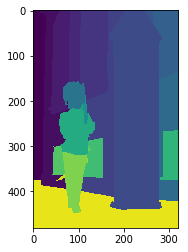

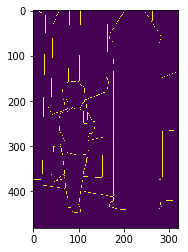

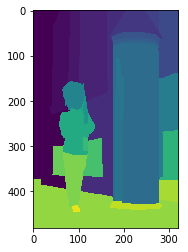

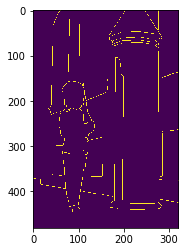

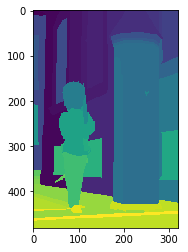

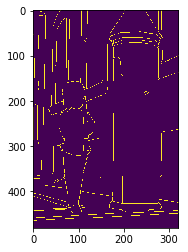

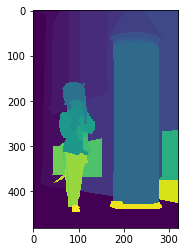

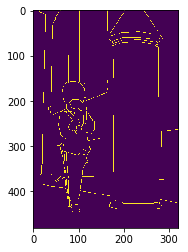

My Segmentation With K = 5 :


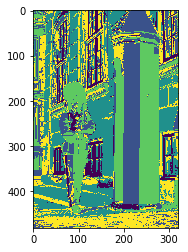

For The Picture :  90076


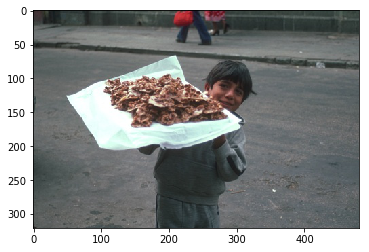

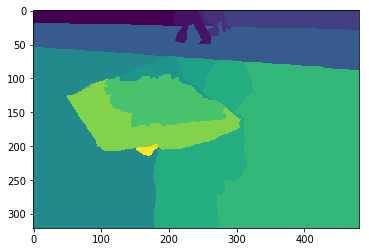

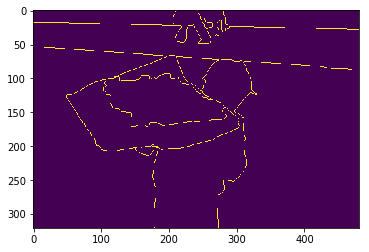

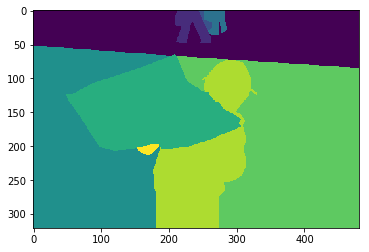

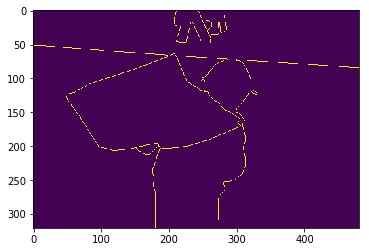

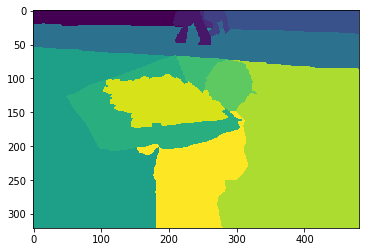

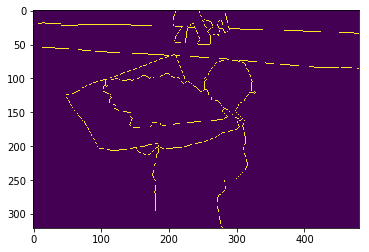

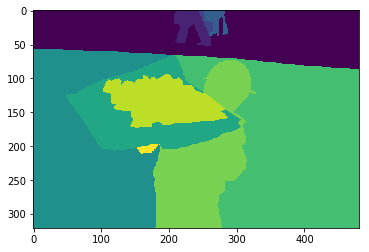

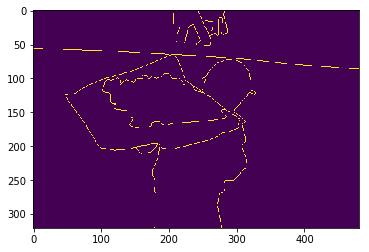

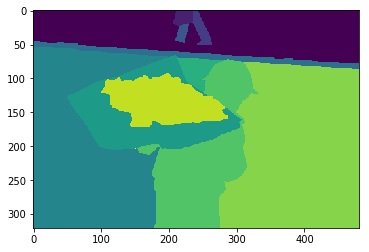

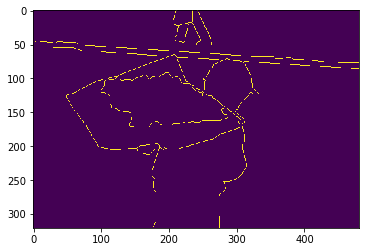

My Segmentation With K = 5 :


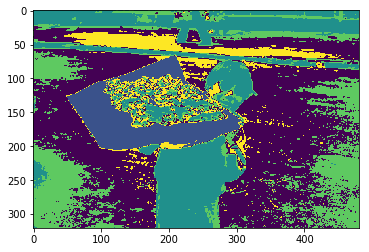

In [16]:
os.chdir('/home/harry/python/kmeans-spectral-clustering/BSR/BSDS500/data/images/train')
for i in Pictures_List :
    print("For The Picture : ",i)
    img,mat = ImageAndSegmentations(i)
    hight = img.shape[0]
    width = img.shape[1]
    Kmean_img = From3DTo2D(img)
    kmeans = KMeans(n_clusters = 5).fit(Kmean_img)
    label = kmeans.labels_
    image =  From2DTo3D(label,hight,width)
    print ("My Segmentation With K = 5 :")
    plt.imshow(image)
    plt.show()     